## 실습 문제: 시그모이드 함수 구현 및 시각화

**설명**:
시그모이드(Sigmoid) 함수는 로지스틱 함수라고도 불리며, 임의의 실수 입력값을 **0과 1 사이의 값으로 변환**하는 데 사용됩니다. 과거에는 인공 신경망의 활성화 함수나 로지스틱 회귀와 같은 모델에서 출력을 확률처럼 해석하기 위해 널리 사용되었습니다. 함수의 출력이 부드러운 **'S'자 형태**를 띠는 것이 특징입니다. 이 실습을 통해 시그모이드 함수를 직접 구현하고 그래프로 그려보겠습니다.

$$S(x) = \frac{1}{1 + e^{-x}}$$

**요구사항**:
* `np.linspace()`를 사용하여 **x**의 범위를 -10부터 10까지 100개의 균일한 간격으로 생성하세요.
* 위 수학 공식을 바탕으로, 입력 `x`에 대한 시그모이드 함수 값을 계산하는 `sigmoid` 함수를 구현하세요. `np.exp()` 함수를 사용합니다.
* Matplotlib을 사용하여 x값에 따른 시그모이드 함수 값을 라인 그래프로 그리세요. 그래프의 제목은 "Sigmoid Function", x축 레이블은 "x", y축 레이블은 "S(x)"로 설정합니다.
* 그래프의 **y=0.5** 지점에 수평선(`axhline`)을 점선으로 추가하여, 입력이 0일 때 출력이 0.5가 되는 시그모이드 함수의 중심점을 시각적으로 확인하세요.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x: np.ndarray) -> np.ndarray:
    """
    입력된 배열의 각 원소에 시그모이드 함수를 적용합니다.

    Args:
        x (np.ndarray): 숫자들로 이루어진 NumPy 배열.

    Returns:
        np.ndarray: 시그모이드 함수가 적용된 결과 배열.
    """
    return 1 / (1+np.exp(-x))


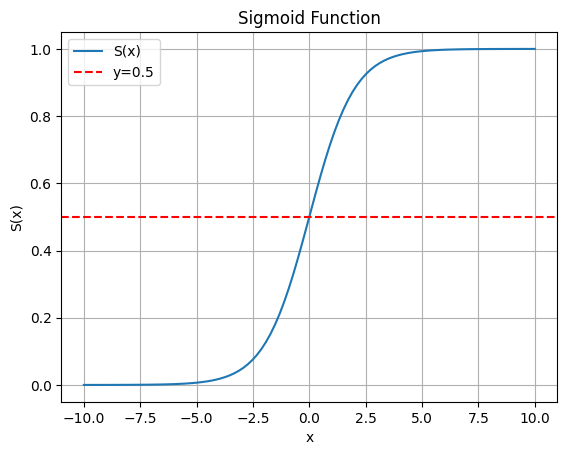

In [3]:
# x 값 생성
x = np.linspace(-10, 10, 100)

# 시그모이드 함수 계산
y = sigmoid(x)

# 그래프 그리기
plt.plot(x, y, label="S(x)")
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("S(x)")
plt.axhline(y=0.5, color='r', linestyle='--', label="y=0.5")
plt.grid(True)
plt.legend()

## 실습 문제: ReLU 함수 구현 및 시각화

**설명**:
ReLU(Rectified Linear Unit) 함수, $f(x) = \max(0, x)$는 딥러닝에서 가장 널리 사용되는 활성화 함수 중 하나입니다. 입력값이 0보다 작으면 0을 반환하고, 0 이상이면 입력값을 그대로 반환하는 단순한 구조 덕분에 계산이 빠르고, 특정 조건에서 학습을 효율적으로 만듭니다. 이 실습에서는 NumPy와 Matplotlib을 사용하여 ReLU 함수의 동작을 직접 구현하고 그래프로 그려보겠습니다.

$$f(x) = \max(0, x)$$

**요구사항**:

  * `np.linspace()`를 사용하여 **x**의 범위를 -5부터 5까지 100개의 균일한 간격으로 생성하세요.
  * x의 각 원소에 ReLU 함수를 적용한 **y** 값을 계산하세요.
  * Matplotlib을 사용하여 **x**와 **y**를 기반으로 2D 라인 그래프를 그리세요.
  * 그래프의 제목은 "ReLU Function", x축 레이블은 "x", y축 레이블은 "f(x)"로 설정하고, 그리드를 추가하여 가독성을 높이세요.


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x: np.ndarray) -> np.ndarray:
    """
    입력된 배열의 각 원소에 ReLU 함수를 적용합니다.

    Args:
        x (np.ndarray): 숫자들로 이루어진 NumPy 배열.

    Returns:
        np.ndarray: ReLU 함수가 적용된 결과 배열.
    """
    return np.maximum(0,x)


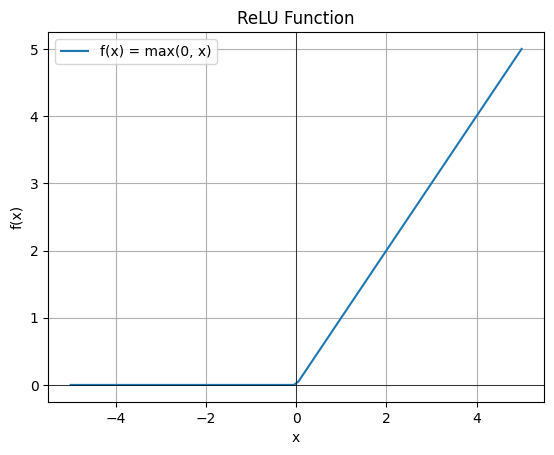

In [5]:

x = np.linspace(-5, 5, 100)
y = relu(x)

# 그래프 그리기
plt.plot(x, y, label="f(x) = max(0, x)")
plt.title("ReLU Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()

## 실습 문제: NumPy로 Dense 레이어 구현 (He 초기화 적용)

**설명**:
신경망의 기본 레이어인 **Dense 레이어**를 NumPy를 사용하여 구현합니다. 이 레이어는 `Y = X @ W + b` 연산을 통해 데이터를 변환합니다. NumPy의 강력한 배열 연산과 브로드캐스팅을 활용하여, 가중치(`W`)를 **He 초기화**하고 편향(`b`)을 0으로 초기화합니다. 또한, `__call__` 메서드를 구현하여 `output = layer(input)`처럼 객체를 함수처럼 호출할 수 있게 합니다.

$$Y = X \cdot W + b$$

$$\text{He 초기화 표준편차: } \sigma = \sqrt{\frac{2}{\text{입력 뉴런 수}}}$$

**요구사항**:

1.  **`__init__(self, input_size, output_size)`**:
    * He 초기화 공식에 따라 표준편차 `he_std`를 계산합니다. (`np.sqrt` 사용)
    * **가중치 `self.W`**: `np.random.normal()`을 사용하여 `(input_size, output_size)` 크기의 NumPy 배열을 생성합니다. (평균=0, 표준편차=`he_std`)
    * **편향 `self.b`**: `np.zeros()`를 사용하여 `output_size` 크기의 NumPy 배열을 생성합니다.
2.  **`forward(self, input_matrix: np.ndarray)`**:
    * NumPy의 행렬 곱셈(`@`)과 브로드캐스팅 덧셈을 사용하여 순전파 연산 `input_matrix @ self.W + self.b`를 수행하고 결과 배열을 반환합니다.
    * 역전파 계산을 위해 입력 `input_matrix`를 `self.input`에 저장합니다.
3.  **`__call__(self, input_matrix: np.ndarray)`**:
    * `forward` 메서드를 호출하여 그 결과를 그대로 반환합니다.

In [6]:
import numpy as np

class Dense:
    """NumPy를 사용한 완전 연결 계층. Y = X @ W + b 연산을 수행합니다."""
    def __init__(self, input_size: int, output_size: int):
        # TODO 1: He 초기화 공식에 따라 표준편차(he_std)를 계산하세요.
        # TODO 2: (input_size, output_size) 크기의 가중치 행렬 W를 초기화하세요.
        # TODO 3: output_size 크기의 편향 행렬 b를 0으로 초기화하세요.
        he_std = np.sqrt(2/input_size)
        self.W = np.random.normal(0, he_std, (input_size, output_size))
        self.b = np.zeros((output_size))
        pass

    def forward(self, input_matrix: np.ndarray) -> np.ndarray:
        """순전파 연산을 수행합니다."""
        # TODO 4: 순전파를 계산하고 결과를 반환하세요.
        # self.input에 입력 행렬을 저장하는 것을 잊지 마세요.
        self.input = input_matrix

        return input_matrix @ self.W + self.b
        pass

    def __call__(self, input_matrix: np.ndarray) -> np.ndarray:
        """객체를 함수처럼 호출할 수 있게 합니다."""
        # TODO 5: self.forward 메서드를 호출하여 결과를 반환하세요.
        return self.forward(input_matrix)
        pass


In [8]:
BATCH_SIZE = 32
INPUT_SIZE = 4  # 입력 데이터의 특성 수
OUTPUT_SIZE = 3  # 출력 데이터의 특성 수

# 1. Dense 레이어 생성
dense_layer = Dense(input_size=INPUT_SIZE, output_size=OUTPUT_SIZE)
print(f"생성된 Dense 레이어:")
print(f"  - 가중치 W shape: {dense_layer.W.shape}")
print(f"  - 편향 b shape: {dense_layer.b.shape}\n")

# 2. 임의의 입력 데이터 생성 (NumPy 사용)
X = np.random.rand(BATCH_SIZE, INPUT_SIZE)
print(f"입력 데이터 X shape: {X.shape}\n")

# 3. 순전파 실행 (__call__ 메서드 사용)
Y = dense_layer(X)
print("순전파 실행: Y = dense_layer(X)")
print(f"  - 출력 Y shape: {Y.shape}")
print(f"  - 레이어에 저장된 입력 shape: {dense_layer.input.shape}")

# He 초기화 표준편차 확인 (참고)
print(f"\nHe 초기화 (input={INPUT_SIZE}):")
print(f"  - 이론적 표준편차 (sigma): {np.sqrt(2.0 / INPUT_SIZE):.4f}")
print(f"  - 실제 생성된 W의 표준편차: {np.std(dense_layer.W):.4f}")

생성된 Dense 레이어:
  - 가중치 W shape: (4, 3)
  - 편향 b shape: (3,)

입력 데이터 X shape: (32, 4)

순전파 실행: Y = dense_layer(X)
  - 출력 Y shape: (32, 3)
  - 레이어에 저장된 입력 shape: (32, 4)

He 초기화 (input=4):
  - 이론적 표준편차 (sigma): 0.7071
  - 실제 생성된 W의 표준편차: 0.4890


## 실습 문제: Numpy로 Dataset 클래스 구현
**설명**:
효과적인 머신러닝 모델을 만들려면 데이터를 체계적으로 관리하는 것이 중요합니다. 이번 실습에서는 Python 리스트 대신 **`Numpy`** 의 `ndarray`를 사용하여 입력 데이터(특성, **X**)와 정답(레이블, **y**)을 효율적으로 관리하는 `Dataset` 클래스를 구현합니다. 이 클래스는 `len(dataset)`으로 길이를 재고 `dataset[0]`처럼 특정 데이터에 접근하는 기능을 지원합니다. 또한, `numpy.genfromtxt`를 사용해 `iris.csv` 파일을 읽고, Numpy 배열 연산으로 원-핫 인코딩을 수행하는 `load_data` 함수도 함께 구현합니다.

**요구사항**:
1.  **`Dataset` 클래스 구현**:
    * **`__init__(self, X, y)`**:
        * 입력받은 `X`와 `y` (Numpy `ndarray`)를 그대로 `self.X`와 `self.y`에 저장합니다.
        * `X`와 `y`의 데이터 개수(첫 번째 차원의 크기, `shape[0]`)가 다를 경우, `ValueError` 예외를 발생시킵니다.
    * **`__len__(self)`**:
        * `len()` 내장 함수를 `Dataset` 객체에 사용할 수 있도록, 데이터셋의 총 샘플 개수( `self.X.shape[0]` )를 반환해야 합니다.
    * **`__getitem__(self, idx)`**:
        * `dataset[idx]`와 같이 대괄호 인덱싱을 사용할 수 있도록, `idx`에 해당하는 **하나의 특성 데이터(1D `ndarray`)와 레이블 데이터(1D `ndarray`)를 튜플 형태로 반환**해야 합니다.
2.  **`load_data(filepath)` 함수 구현**:
    * `numpy.genfromtxt` 함수를 사용하여 <a href="https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv">`iris.csv` 파일</a>을 읽습니다. (힌트: `dtype=str`, `delimiter=','`, `skip_header=1`)
    * 읽어온 데이터(문자열 배열)에서 특성(처음 4개 열)과 레이블(마지막 열)을 분리합니다.
    * 특성 데이터는 `float` 타입의 `ndarray`로 변환합니다.
    * 문자열 레이블을 **Numpy 연산을 사용해 원-핫 인코딩** 벡터(`float` 타입)로 변환합니다. (예: 'Setosa' -> `[1.0, 0.0, 0.0]`)
    * 최종적으로 `X`와 `y` (원-핫 인코딩된) `ndarray`로 `Dataset` 클래스의 인스턴스를 생성하여 반환합니다.

**다운로드**

- iris.csv: https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv

In [ ]:
import numpy as np

class Dataset:
    """
    전체 데이터를 Numpy ndarray 형태로 가지고, len() 및 인덱싱을 지원하는 클래스.
    """
    def __init__(self, X: np.ndarray, y: np.ndarray):
        # TODO 1-1: X와 y의 행의 수(shape[0])가 다르면 ValueError를 발생시키세요.
        if X.shape[0] != y.shape[0]:
            raise ValueError("X와 y의 샘플 개수가 일치하지 않습니다.")
        # TODO 1-2: X와 y를 인스턴스 변수로 저장하세요.
        self.X = X
        self.y = y

    def __len__(self) -> int:
        # TODO 2: 데이터셋의 총 샘플 개수(X의 행의 수)를 반환하세요.
        return self.X.shape[0]

    def __getitem__(self, idx: int) -> tuple[np.ndarray, np.ndarray]:
        # TODO 3: idx번째 샘플의 X 데이터와 y 데이터를 튜플로 반환하세요.
        return (self.X[idx], self.y[idx])


def load_data(filepath: str) -> 'Dataset':
    """
    CSV 파일을 Numpy로 읽고 처리하여 Dataset 객체를 반환합니다.
    """
    label_map = {'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}

    # TODO 4: np.genfromtxt를 사용해 CSV 파일을 문자열(dtype=str)로 읽어옵니다.
    # 헤더는 건너뜁니다(skip_header=1).
    data_str = np.genfromtxt(filepath, dtype=str, delimiter=',', skip_header=1)

    # TODO 5: data_str 배열을 X(특성)와 y(레이블)로 분리합니다.
    # X_str: 처음 4개 열. 이후 float로 변환해야 합니다.
    # y_str: 마지막 열 (문자열)
    X_str = data_str[:, :4]
    y_str = data_str[:, 4:]

    # TODO 6: X_str을 float 타입의 ndarray (X)로 변환합니다.
    X = np.array(X_str.astype(float))

    # TODO 7: y_str (문자열)을 원-핫 인코딩 'ndarray (y_one_hot)'로 변환합니다.
    y_one_hot = np.array([np.eye(3)[label_map[idx[0].strip('"')]] for idx in y_str])

    # TODO 8: 완성된 X와 y_one_hot으로 Dataset 객체를 생성하여 반환하세요.
    return Dataset(X, y_one_hot)


In [32]:
# 아래 코드는 구현을 테스트하기 위한 예제입니다.
iris_dataset = load_data('iris.csv')

# __len__ 기능 테스트
print(f"총 데이터 개수: {len(iris_dataset)}")

# __getitem__ 기능 테스트
first_X, first_y = iris_dataset[0]
print(f"\n첫 번째 샘플 (X): {first_X} (dtype: {first_X.dtype})")
print(f"첫 번째 샘플 (y): {first_y} (dtype: {first_y.dtype})")

last_X, last_y = iris_dataset[-1]
print(f"\n마지막 샘플 (X): {last_X}")
print(f"마지막 샘플 (y): {last_y}")

print(f"\nX data shape: {iris_dataset.X.shape}")
print(f"y data shape: {iris_dataset.y.shape}")

총 데이터 개수: 150

첫 번째 샘플 (X): [5.1 3.5 1.4 0.2] (dtype: float64)
첫 번째 샘플 (y): [1. 0. 0.] (dtype: float64)

마지막 샘플 (X): [5.9 3.  5.1 1.8]
마지막 샘플 (y): [0. 0. 1.]

X data shape: (150, 4)
y data shape: (150, 3)


## 실습 문제: NumPy 기반 DataLoader 클래스 구현
**설명**:
전체 데이터를 한 번에 학습하는 것은 매우 비효율적일 수 있습니다. 머신러닝에서는 이 문제를 해결하기 위해 데이터를 여러 개의 작은 묶음, 즉 **미니배치(mini-batch)**로 나누어 처리합니다. `DataLoader`는 `__len__`과 `__getitem__`이 구현된 `Dataset` 객체(내부적으로 `X`, `y` NumPy 배열을 가짐)를 받아서, 지정된 크기의 미니배치로 나누어 공급해주는 역할을 합니다. 또한, 매 학습 주기(epoch)마다 데이터 순서를 무작위로 섞어주어 모델이 데이터의 순서를 외우는 것을 방지하고 일반화 성능을 높여줍니다. 이번 실습에서는 Python의 **이터레이터(iterator)** 프로토콜인 `__iter__`와 `__next__`를 구현하여, `for` 반복문에서 NumPy 배열로 구성된 미니배치를 하나씩 꺼내 쓸 수 있는 `DataLoader`를 완성합니다.

**요구사항**:
1.  **`__init__(self, dataset: 'Dataset', batch_size, shuffle)`**:
    * 생성자에서는 `Dataset` 객체를 `self.dataset`으로 저장하고, `batch_size`, `shuffle` 여부를 저장합니다.
    * `len(dataset)`을 호출하여 총 샘플 수를 `self.n_samples`에 저장하고, 0부터 `n_samples - 1`까지의 인덱스 리스트를 생성하여 `self.indices`에 초기화합니다.
2.  **`__iter__(self)`**:
    * `for` 루프가 시작될 때 호출되며, 이터레이터 객체 자신(`self`)을 반환해야 합니다.
    * 만약 `self.shuffle`이 `True`라면, **매번 `__iter__`가 호출될 때마다** `self.indices` 리스트를 무작위로 섞어줍니다. (힌트: `random.shuffle`)
    * 다음 배치를 처음부터 순회할 수 있도록 위치 변수(`self.current_pos`)를 `0`으로 리셋합니다.
3.  **`__next__(self)`**:
    * `for` 루프에서 다음 항목을 요청할 때마다 호출됩니다.
    * 현재 위치(`current_pos`)부터 `batch_size`만큼의 인덱스를 `self.indices` 리스트에서 추출합니다.
    * 추출된 인덱스 리스트를 사용해 `self.dataset.X`와 `self.dataset.y`에서 미니배치 데이터를 추출합니다. (힌트: NumPy 팬시 인덱싱)
    * 모든 데이터를 순회했다면(즉, `self.current_pos`가 총 샘플 수를 넘었다면), `StopIteration` 예외를 발생시켜 `for` 루프가 종료되도록 해야 합니다.
4.  **`__len__(self)`**:
    * `len()` 내장 함수를 사용할 수 있도록, 데이터로더가 한 에포크 동안 생성할 **총 미니배치의 개수**를 계산하여 반환합니다. (힌트: `math.ceil` 사용)

In [24]:
import random
import math

class DataLoader:
    """Dataset 객체를 순회하며 미니배치를 생성하는 이터레이터."""
    def __init__(self, dataset: 'Dataset', batch_size: int = 32, shuffle: bool = True):
        # TODO 1: dataset 객체를 self.dataset에 저장하고,
        #         batch_size와 shuffle을 self 변수에 저장하세요.
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle

        # TODO 2: len()을 사용해 dataset의 총 샘플 수를 self.n_samples에 저장하세요.
        self.n_samples = len(self.dataset)

        # TODO 3: 0부터 self.n_samples - 1 까지의 인덱스 리스트를 생성하여
        #         self.indices에 저장하고, self.current_pos를 0으로 초기화하세요.
        self.indices = list(range(self.n_samples))
        self.current_pos = 0

    def __iter__(self):
        """이터레이션 시작 시 호출되며, 데이터를 섞고 위치를 초기화합니다."""
        # TODO 4: self.shuffle이 True이면 self.indices를 섞고(np.random.shuffle),
        #         self.current_pos를 0으로 리셋하세요.
        #         마지막에는 반드시 self를 반환해야 합니다.
        if self.shuffle :
            np.random.shuffle(self.indices)
            self.current_pos = 0

        return self

    def __next__(self) -> tuple[np.ndarray, np.ndarray]:
        """다음 미니배치를 생성하여 NumPy 배열 형태로 반환합니다."""
        # TODO 5: self.current_pos가 self.n_samples와 같거나 크면 StopIteration을 발생시키세요.
        if self.current_pos >= self.n_samples:
            raise StopIteration

        # TODO 6: 현재 위치부터 배치 크기만큼의 끝 인덱스(end_pos)를 계산하세요.
        # (힌트: min 함수와 self.n_samples를 사용해 데이터셋 끝을 넘지 않도록 합니다.)
        end_pos = min(self.current_pos + self.batch_size, self.n_samples)

        # TODO 7: self.indices를 슬라이싱하여 이번 배치에 사용할 인덱스 리스트(batch_indices)를 만드세요.
        batch_indices = self.indices[self.current_pos:end_pos]

        # TODO 8: batch_indices를 사용해 *self.dataset.X*와 *self.dataset.y*에서 데이터를 추출하세요. (팬시 인덱싱)
        batch_X = self.dataset.X[batch_indices]
        batch_y = self.dataset.y[batch_indices]

        # TODO 9: 다음 배치를 위해 self.current_pos를 업데이트 하세요. (batch_size만큼 증가)
        self.current_pos += self.batch_size

        # TODO 10: 추출된 NumPy 배열 batch_X와 batch_y를 튜플로 반환하세요.
        return (batch_X, batch_y)

    def __len__(self) -> int:
        """데이터로더가 생성할 총 배치의 개수를 반환합니다."""
        # TODO 11: 총 샘플 수(self.n_samples)를 배치 크기로 나눈 값을 올림 (np.ceil)하여 반환하세요.
        return np.ceil(self.n_samples / self.batch_size)


In [25]:

# 데이터셋을 (X, y) 튜플로 구성합니다.
iris_dataset = load_data('iris.csv')

BATCH_SIZE = 32
# full_dataset 튜플을 DataLoader에 전달합니다.
train_loader = DataLoader(iris_dataset, batch_size=BATCH_SIZE, shuffle=True)

print(f"데이터셋 크기: {len(iris_dataset[0])}개")
print(f"배치 크기: {BATCH_SIZE}")

# len() 함수가 올바르게 구현되었는지 테스트
try:
    print(f"총 배치 개수: {len(train_loader)}개\n")
except NotImplementedError:
    print("총 배치 개수: __len__ 메서드를 구현하세요.\n")
except TypeError:
    print("총 배치 개수: __len__ 메서드를 구현하세요.\n")


# for 루프를 사용해 DataLoader 순회 (첫 번째 에포크)
print("--- 첫 번째 에포크 시작 ---")
for i, (batch_X, batch_y) in enumerate(train_loader):
    if batch_X is None or batch_y is None: # 학생이 TODO를 완료하지 않았을 경우
          print("배치 생성 로직(TODO 6, 8)을 완성하세요.")
          break
    print(f"배치 {i+1}:")
    print(f"  - X shape: {batch_X.shape}")
    print(f"  - y shape: {batch_y.shape}")

# DataLoader는 이터레이터이므로, for 루프를 다시 돌리면 __iter__가 호출되어
# 데이터가 다시 셔플되고(shuffle=True일 경우) 처음부터 순회합니다.
print("\n--- 두 번째 에포크 시작 (데이터가 다시 셔플됨) ---")
for i, (batch_X, batch_y) in enumerate(train_loader):
    if batch_X is None or batch_y is None:
          print("배치 생성 로직(TODO 6, 8)을 완성하세요.")
          break
    print(f"배치 {i+1}:")
    print(f"  - X shape: {batch_X.shape}")
    print(f"  - y shape: {batch_y.shape}")

데이터셋 크기: 2개
배치 크기: 32
총 배치 개수: __len__ 메서드를 구현하세요.

--- 첫 번째 에포크 시작 ---
배치 1:
  - X shape: (32, 4)
  - y shape: (32, 3)
배치 2:
  - X shape: (32, 4)
  - y shape: (32, 3)
배치 3:
  - X shape: (32, 4)
  - y shape: (32, 3)
배치 4:
  - X shape: (32, 4)
  - y shape: (32, 3)
배치 5:
  - X shape: (22, 4)
  - y shape: (22, 3)

--- 두 번째 에포크 시작 (데이터가 다시 셔플됨) ---
배치 1:
  - X shape: (32, 4)
  - y shape: (32, 3)
배치 2:
  - X shape: (32, 4)
  - y shape: (32, 3)
배치 3:
  - X shape: (32, 4)
  - y shape: (32, 3)
배치 4:
  - X shape: (32, 4)
  - y shape: (32, 3)
배치 5:
  - X shape: (22, 4)
  - y shape: (22, 3)


## 실습 문제: 훈련, 검증, 테스트 데이터셋 분할 (인덱스 활용)

**설명**:
머신러닝 모델을 개발할 때, 전체 데이터셋을 **훈련(Training)**, **검증(Validation)**, **테스트(Test)** 세트로 나누는 것은 매우 중요합니다. 모델은 **훈련 세트**로 학습하고, **검증 세트**를 사용해 모델의 성능을 조정(튜닝)하며, 마지막으로 **테스트 세트**를 통해 최종 성능을 공정하게 평가합니다.

이번 실습에서는 원본 데이터를 직접 섞는 대신, **인덱스(index)를 섞은 뒤** NumPy의 '팬시 인덱싱(Fancy Indexing)'을 사용하여 데이터를 분할합니다. 이 방법은 원본 데이터를 수정하지 않는(non-destructive) 더 안전하고 권장되는 방식입니다.

**요구사항**:
  - `train_test_split` 함수를 완성하세요. 이 함수는 `X`, `y`와 `test_size`를 인자로 받습니다.
  - `X.shape[0]`을 사용해 전체 데이터 개수(N)를 구합니다.
  - `np.arange(N)`로 원본 데이터의 인덱스 배열(예: `[0, 1, ..., 99]`)을 생성합니다.
  - `np.random.permutation()`을 사용하여 위에서 생성한 **인덱스 배열**의 순서를 무작위로 섞습니다.
  - `test_size` 비율(예: 0.2)을 기반으로 훈련 세트와 테스트 세트를 나눌 **인덱스 경계**(`split_point`)를 계산합니다. (예: 100개 데이터, `test_size=0.2` -\> `split_point=80`)
  - 섞인 인덱스 배열을 `split_point` 기준으로 `train_indices`와 `test_indices`로 슬라이싱합니다.
  - \*\*동일한 `train_indices`\*\*를 `X`와 `y`에 각각 팬시 인덱싱하여 `X_train`, `y_train`을 생성합니다.
  - \*\*동일한 `test_indices`\*\*를 `X`와 `y`에 각각 팬시 인덱싱하여 `X_test`, `y_test`를 생성합니다.
  - 4개의 배열 (`X_train`, `X_test`, `y_train`, `y_test`)을 튜플로 반환합니다.

In [ ]:
import numpy as np

def train_test_split(X: np.ndarray, y: np.ndarray, test_size: float = 0.2
                     ) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """
    X와 y 데이터를 훈련 세트와 테스트 세트로 분할합니다.
    (원본 데이터를 수정하지 않고, X와 y의 짝을 유지)

    Args:
        X: 특징 데이터 배열 (N, M)
        y: 레이블 데이터 배열 (N,)
        test_size: 전체 데이터 중 테스트 세트가 차지할 비율 (0.0 ~ 1.0)

    Returns:
        (X_train, X_test, y_train, y_test) 튜플
    """

    # 1. 원본 데이터의 총 개수(N)를 가져옵니다.
    N = X.shape[0]

    # 2. 0부터 N-1까지의 인덱스 배열을 생성하고, 무작위로 섞습니다.
    first_indices = np.arange(N)
    indices = np.random.permutation(first_indices)

    # 3. test_size를 기반으로 훈련/테스트 경계 인덱스를 계산합니다.
    # (N * (1 - test_size))
    border = int(N*(1-test_size))

    # 4. 섞인 인덱스를 훈련용과 테스트용으로 분할합니다.
    train_indices = indices[:border]
    test_indices = indices[border:]

    # 5. 동일한 인덱스를 X와 y에 적용하여 데이터를 분할합니다.
    # (팬시 인덱싱 사용)
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

In [30]:
# --- 테스트 코드 ---

# 1. 원본 데이터 생성 (100개의 샘플, 4개의 특징)
X = np.random.randn(100, 4)
# 100개의 레이블 (첫 번째 특징이 0보다 크면 1, 아니면 0)
y = (X[:, 0] > 0).astype(int)

# 원본 데이터의 처음 5행을 따로 저장
X_original_head = X[:5].copy()

print(f"Original X shape: {X.shape}")
print(f"Original y shape: {y.shape}")
print("--- Splitting dataset... ---")

# 2. 함수 실행 (테스트 사이즈 25%)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25)

print(f"X_train shape: {X_tr.shape}, y_train shape: {y_tr.shape}")
print(f"X_test shape: {X_te.shape}, y_test shape: {y_te.shape}")
print("---------------------------------")

# 3. 원본 데이터가 수정되지 않았는지 확인
was_modified = not np.array_equal(X_original_head, X[:5])
print(f"Was original X modified? {was_modified}")
print("Original X head (should be unchanged):")
print(X_original_head)

Original X shape: (100, 4)
Original y shape: (100,)
--- Splitting dataset... ---
X_train shape: (75, 4), y_train shape: (75,)
X_test shape: (25, 4), y_test shape: (25,)
---------------------------------
Was original X modified? False
Original X head (should be unchanged):
[[ 0.4345867   0.20767095  0.66052401 -0.56831332]
 [-0.21403785  0.74032162 -1.48126435 -0.47843484]
 [ 0.06277918 -0.4044661   0.4474008   0.12023772]
 [ 2.5562172  -0.90256823 -0.14859454 -0.52099574]
 [ 0.74636775  1.69212318  0.38976125  0.38179928]]
